### **1. convert vector (.gpkg) truth water to raster (.tif) truth water.**
### **2. perform image padding for ascending, descending and truth images.**



In [2]:
import os
os.chdir('..')
from notebooks import config
import shutil
import glob
import matplotlib.pyplot as plt
from utils.imgShow import imgShow
from utils.raster_vec import vec2mask, raster2vec
from utils.geotif_io import readTiff, writeTiff


### Vector to raster for the water truth

In [4]:
# idx = '39'
# # for id in range(0,36):    #
# #   idx = str(id+1).rjust(2,'0')
# print('process -> scene ' + idx)
# path_vec = config.root_proj + '/data/dset/s1_truth/scene' + idx + '_wat_truth.gpkg'
# path_img = config.root_proj + '/data/dset/s1_ascend/scene' + idx + '_s1as.tif'  # base image
# path_save = config.root_proj + '/data/dset/s1_truth/scene' + idx + '_wat_truth.tif'
# mask = vec2mask(path_vec, path_img, path_save)


process -> scene 39


## Check

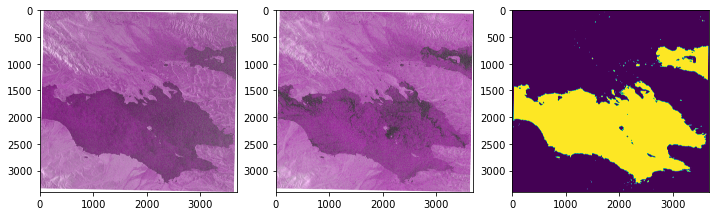

In [3]:
## check
idx = '38'
path_s1as = config.root_proj + '/data/dset/s1_ascend/scene' + idx + '_s1as.tif'
path_s1des = config.root_proj + '/data/dset/s1_descend/scene' + idx + '_s1des.tif'
path_truth = config.root_proj + '/data/dset/s1_truth/scene' + idx + '_wat_truth.tif'

s1as, s1as_info = readTiff(path_in = path_s1as)
s1des, s1des_info = readTiff(path_in = path_s1des)
s1_truth, s1_truth_info = readTiff(path_in = path_truth)

plt.figure(figsize=(12, 6))
plt.subplot(1,3,1)
imgShow(s1as, color_bands=(0,1,0), clip_percent=2)
plt.subplot(1,3,2)
imgShow(s1des, color_bands=(0,1,0), clip_percent=2)
plt.subplot(1,3,3)
imgShow(s1_truth, color_bands=(0,1,0),clip_percent=2)


## Padding
### Ascending, descending and ground truth image

In [8]:
idx = '39'

# for id in range(0,39):    #
#   idx = str(id+1).rjust(2,'0')

print('process -> scene ' + idx)
### 1.read in data (set ascending/descending/truth image manually)
# path_img = config.root_proj + '/data/dset/s1_ascend/scene' + idx + '_s1as.tif'
# path_img = config.root_proj + '/data/dset/s1_descend/scene' + idx + '_s1des.tif'
path_img = config.root_proj + '/data/dset/s1_truth/scene' + idx + '_wat_truth.tif'
path_img_pad = path_img.split('.')[0]+'_pad.tif'
img, img_info = readTiff(path_in = path_img)

### 2. calculate new padded extent
pixel_pad = 894
x_res, y_res = abs(img_info['geotrans'][1]), abs(img_info['geotrans'][5])
left_up = [img_info['geoextent'][0], img_info['geoextent'][3]]
right_down = [img_info['geoextent'][1], img_info['geoextent'][2]]
left_up_pad = [left_up[0]-x_res*pixel_pad, left_up[1]+y_res*pixel_pad]
right_down_pad = [right_down[0]+x_res*pixel_pad, right_down[1]-y_res*pixel_pad]

### 3. padding by using gdal_translate tool
extent_pad = str(left_up_pad[0])+' '+str(left_up_pad[1])+' '+str(right_down_pad[0])+' '+str(right_down_pad[1]) 
command_as = 'gdal_translate -projwin ' + extent_pad + ' -co COMPRESS=LZW -a_nodata 0' + ' ' + path_img + ' ' + path_img_pad
print(os.popen(command_as).read())



process -> scene 39
Input file size is 4119, 3589
0...10...20...30...40...50...60...70...80...90...100 - done.



## Check

scene 10


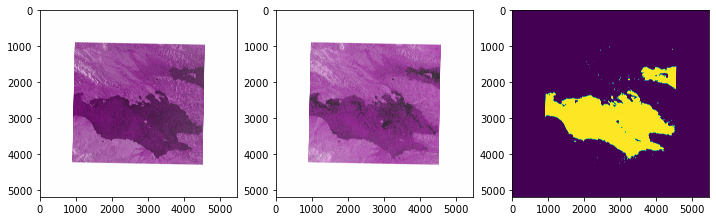

In [7]:
## check
idx = '10'
print('scene ' + idx)
path_s1as_pad = config.root_proj + '/data/dset/s1_ascend/scene' + idx + '_s1as_pad.tif'
path_s1des_pad = config.root_proj + '/data/dset/s1_descend/scene' + idx + '_s1des_pad.tif'
path_truth_pad = config.root_proj + '/data/dset/s1_truth/scene' + idx + '_wat_truth_pad.tif'

s1as_pad, s1as_pad_info = readTiff(path_in = path_s1as_pad)
s1des_pad, s1des_pad_info = readTiff(path_in = path_s1des_pad)
s1_truth, s1_truth_info = readTiff(path_in = path_truth_pad)

plt.figure(figsize=(12, 6))
plt.subplot(1,3,1)
imgShow(s1as_pad, color_bands=(0,1,0), clip_percent=2)
plt.subplot(1,3,2)
imgShow(s1des_pad, color_bands=(0,1,0), clip_percent=2)
plt.subplot(1,3,3)
imgShow(s1_truth, color_bands=(0,1,0),clip_percent=2)



### Mask to vector

In [ ]:
# ## image (truth image) to vector

# # idx = '20'
# for idx in ['01','02','03','04','05','06','07','08','09','10',\
#             '11','12','13','14','15','16','17','18','19','20',\
#             '21','22','23']:

#   image_path = config.root_proj + '/s1_water_/scene' + idx + '_water.tif'
#   vec_path = config.root_proj + '/s1_water_/scene' + idx + '_water.gpkg'

#   raster2vec(raster_path=image_path, output_path=vec_path, dn_values=[1])
